In [116]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import wandb
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
np.seterr(all='raise')

# path = '/Users/aaryansharma/Downloads/College\ Material/IIIT\ Hyderabad/Semester\ III-I/Statistical\ Methods\ in\ AI\ CS7.403/Assignments/Assignment\ 3/WineQT.csv %    aaryansharma@Aaryans-MacBook-Air ~ % /Users/aaryansharma/Downloads/College\ Material/IIIT\ Hyderabad/Semester\ III-I/Statistical\ Methods\ in\ AI\ CS7.403/Assignments/Assignment\ 3/WineQT.csv'

path = '/Users/aaryansharma/Downloads/College Material/IIIT Hyderabad/Semester III-I/Statistical Methods in AI CS7.403/Assignments/Assignment 3/WineQT.csv'

wine_df = pd.read_csv(path)

# wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [137]:
wandb.login(key='a795fdc65408d39107ffa8441f479a2fde390a13')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/aaryansharma/.netrc


True

In [118]:
wandb.init(project='smai-assignment3', entity='aaryan-s', name='part1')

In [3]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
wine_df = wine_df.drop(['Id'], axis=1)

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
y = wine_df['quality'].values
print(y)
y -= np.min(y)
y = y.astype(int)
print(np.max(y))
y_chart = y.copy()
wine_df.drop(['quality'], axis=1, inplace=True)
wine_df.head()

[5 5 5 ... 5 6 5]
5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
X = wine_df.values
print(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]


array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [8]:
X.shape, y.shape
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))
print(y.shape)


(1143, 6)


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [10]:
ic(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

ic| X_train.shape: (685, 11)
    y_train.shape: (685, 6)
    X_test.shape: (229, 11)
    y_test.shape: (229, 6)
    X_val.shape: (229, 11)
    y_val.shape: (229, 6)


((685, 11), (685, 6), (229, 11), (229, 6), (229, 11), (229, 6))

[  6  33 483 462 143  16]


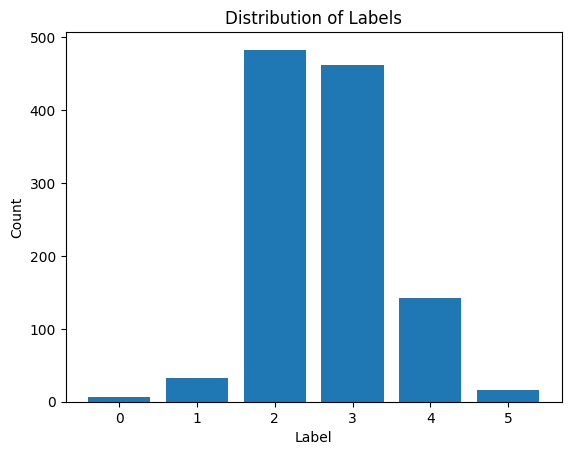

In [11]:
# Count the number of occurrences of each label
label_counts = np.bincount(y_chart)
print(label_counts)
no_of_labels = len(label_counts)
# Plot the distribution of labels
plt.bar(range(len(label_counts)), label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


In [138]:
class MLP:
    def __init__(self, n_hidden_layers, n_neurons, activation='relu', lr=0.01, optimizer='sgd', epochs=100, task='classification'):
        self.task = task  # either 'classification' or 'regression'
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.lr = lr
        self.epochs = epochs
        self.weights = []
        self.biases = []
        self.activations = []
        self.activation = activation
        self.optimizer = optimizer

        self.activation_functions = {
            'sigmoid': (self._sigmoid, self._sigmoid_derivative),
            'tanh': (self._tanh, self._tanh_derivative),
            'relu': (self._relu, self._relu_derivative),
        }

    def _init_layers(self, X, y):
        np.random.seed(42)  # for reproducibility
        
        # Check if y is 1D and if so, reshape to have it 2D as a single column. 
        # This is needed because we have single output neuron for regression tasks.
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)
        
        # Construct the full layer list: [input_size, hidden1, hidden2, ..., output_size]
        # Here, for regression, the output size is 1 (single neuron for the output layer).
        layer_dims = [X.shape[1]] + self.n_neurons + [y.shape[1]]

        self.weights = []
        self.biases = []

        # Now, iterate through each layer to initialize weights and biases
        for i in range(len(layer_dims)-1):
            # Initialize weights and biases
            W = np.random.randn(layer_dims[i], layer_dims[i+1]) * 0.1
            b = np.zeros((1, layer_dims[i+1]))

            self.weights.append(W)
            self.biases.append(b)

    
    def _linear(self, Z):
        return Z
    
    def _mean_squared_error(self, predicted, actual):
        return np.mean((predicted - actual)**2)
    
    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def _sigmoid_derivative(self, Z):
        return Z * (1 - Z)

    def _tanh(self, Z):
        return np.tanh(Z)

    def _tanh_derivative(self, Z):
        return 1 - np.tanh(Z) ** 2

    def _relu(self, Z):
        return np.maximum(0, Z)

    def _relu_derivative(self, Z):
        Z[Z <= 0] = 0
        Z[Z > 0] = 1
        return Z
    def _softmax(self, Z):
        exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # stability correction
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probabilities

    def _forward_propagation(self, X):
        self.activations = [X]
        A = X
        for i in range(self.n_hidden_layers):
            Z = A.dot(self.weights[i]) + self.biases[i]
            A = self.activation_functions[self.activation][0](Z)
            self.activations.append(A)

        # Output layer
        Z = A.dot(self.weights[-1]) + self.biases[-1]
        
        if self.task == 'classification':
            A = self._softmax(Z)
        elif self.task == 'regression':
            A = self._linear(Z)
        else:
            raise ValueError("Task type not recognized!")

        self.activations.append(A)
        return A

    def _categorical_cross_entropy(self, predicted, actual):
        m = actual.shape[0]
        # Loss formula, adjusted for numerical stability
        loss = -np.sum(actual * np.log(predicted + 1e-7)) / m
        return loss

    def _backward_propagation(self, y):
        # List to store gradients of weights and biases
        d_weights = []
        d_biases = []

        # Ensure y is the correct shape
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        # Start with the derivative of the loss function w.r.t. predictions
        dA = self.activations[-1] - y

        # Loop over layers in reverse order
        for i in reversed(range(self.n_hidden_layers + 1)):
            # Current layer's input
            A_prev = self.activations[i]

            # Derivative of the weight matrix
            dW = A_prev.T.dot(dA)

            # Derivative of the bias vector (sum over samples)
            db = np.sum(dA, axis=0, keepdims=True)

            # Store gradients
            d_weights.append(dW)
            d_biases.append(db)

            # If not the first layer, backpropagate the gradient through the activation function
            if i > 0:
                W_current = self.weights[i]
                dZ = dA.dot(W_current.T)
                back_activation_function = self.activation_functions[self.activation][1]
                dA = dZ * back_activation_function(A_prev)  # element-wise multiplication

        # Reverse the gradients' list to match the order of self.weights and self.biases
        d_weights = d_weights[::-1]
        d_biases = d_biases[::-1]

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * d_weights[i]
            self.biases[i] -= self.lr * d_biases[i]


    # modify predict method to handle multiple classes
    def predict(self, X):
        predictions = self._forward_propagation(X)
        return np.argmax(predictions, axis=1)

    def evaluate(self, X, y):
        predictions = self._forward_propagation(X)
        
        if self.task == 'classification':
            y_true = np.argmax(y, axis=1)  # Assuming y is one-hot encoded
            y_pred = np.argmax(predictions, axis=1)
            print(classification_report(y_true, y_pred, zero_division=1))
        elif self.task == 'regression':
            mse = mean_squared_error(y, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y, predictions)
            print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
        else:
            raise ValueError("Task type not recognized!")

    def train(self, X, y):
        self._init_layers(X, y)

        batch_size = {
            'bgd': X.shape[0],  # Batch Gradient Descent
            'mbgd': 32,         # Mini-Batch Gradient Descent
            'sgd': 1            # Stochastic Gradient Descent
        }.get(self.optimizer, 32)  # Default is Mini-Batch Gradient Descent
        wandb.init(
            project="smai-logistic",
            config={
            "learning_rate": 0.02,
            "architecture": "MLP",
            "dataset": "MNIST"
            }
        )

        for epoch in range(self.epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                self._forward_propagation(X_batch)
                self._backward_propagation(y_batch)
                if self.task == 'classification':
                    loss = self._categorical_cross_entropy(self.activations[-1], y_batch)
                elif self.task == 'regression':
                    loss = self._mean_squared_error(self.activations[-1], y_batch)
                else:
                    raise ValueError("Task type not recognized!")
                wandb.log({'loss': loss})
        wandb.finish()

In [ ]:
# Logistic Regression

logistic_regression = MLP(n_hidden_layers=0, n_neurons=[], activation='sigmoid', lr=0.01, optimizer='bgd', epochs=100)

logistic_regression.train(X_train, y_train)

print('Training Report')
logistic_regression.evaluate(X_test, y_test)
print('Validation Report')
logistic_regression.evaluate(X_val, y_val)
print('Test Report')
logistic_regression.evaluate(X_test, y_test)

In [14]:
# Multi-layer Perceptron
mlp = MLP(n_hidden_layers=2, n_neurons=[64, 32], activation='relu', lr=0.01, optimizer='mbgd', epochs=100)
mlp.train(X_train, y_train)

print("Train set metrics:")
mlp.evaluate(X_train, y_train)
print("\Val set metrics:")
mlp.evaluate(X_val, y_val)
print("\Test set metrics:")
mlp.evaluate(X_test, y_test)


Train set metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.93      0.68      0.79        19
           2       0.97      0.58      0.73       293
           3       0.58      0.99      0.73       272
           4       0.96      0.30      0.45        88
           5       1.00      0.50      0.67        10

    accuracy                           0.71       685
   macro avg       0.91      0.67      0.73       685
weighted avg       0.81      0.71      0.70       685

\Val set metrics:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      0.00      1.00         9
           2       0.75      0.41      0.53        97
           3       0.49      0.88      0.63        93
           4       0.75      0.23      0.35        26
           5       1.00      0.00      0.00         4

    accuracy                           0

In [15]:
advertisment_df = pd.read_csv('/Users/aaryansharma/Downloads/advertisement.csv')

advertisment_df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


In [17]:
unique_labels = advertisment_df['labels'].str.split(expand=True).stack().unique()
print(len(unique_labels))


8


In [18]:
unique_labels

array(['electronics', 'clothing', 'sports', 'furniture', 'beauty', 'food',
       'home', 'books'], dtype=object)

In [23]:
y = advertisment_df['labels'].str.split(expand=True).stack().str.get_dummies().values
y

(2758, 8)

In [22]:
advertisment_df.to_numpy().shape

(1000, 11)

# Regression

In [109]:
housing_df = pd.read_csv('/Users/aaryansharma/Downloads/HousingData.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(housing_df.to_string(index=False, line_width=1000, justify='left'))


 CRIM     ZN    INDUS  CHAS  NOX    RM    AGE   DIS     RAD  TAX  PTRATIO  B      LSTAT  MEDV
 0.00632  18.0  2.31  0.0   0.5380 6.575  65.2  4.0900  1   296  15.3     396.90  4.98  24.0 
 0.02731   0.0  7.07  0.0   0.4690 6.421  78.9  4.9671  2   242  17.8     396.90  9.14  21.6 
 0.02729   0.0  7.07  0.0   0.4690 7.185  61.1  4.9671  2   242  17.8     392.83  4.03  34.7 
 0.03237   0.0  2.18  0.0   0.4580 6.998  45.8  6.0622  3   222  18.7     394.63  2.94  33.4 
 0.06905   0.0  2.18  0.0   0.4580 7.147  54.2  6.0622  3   222  18.7     396.90   NaN  36.2 
 0.02985   0.0  2.18  0.0   0.4580 6.430  58.7  6.0622  3   222  18.7     394.12  5.21  28.7 
 0.08829  12.5  7.87  NaN   0.5240 6.012  66.6  5.5605  5   311  15.2     395.60 12.43  22.9 
 0.14455  12.5  7.87  0.0   0.5240 6.172  96.1  5.9505  5   311  15.2     396.90 19.15  27.1 
 0.21124  12.5  7.87  0.0   0.5240 5.631 100.0  6.0821  5   311  15.2     386.63 29.93  16.5 
 0.17004  12.5  7.87  NaN   0.5240 6.004  85.9  6.5921  5   

In [110]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [111]:
housing_df.fillna(housing_df.median(), inplace=True)

In [112]:
scaler = StandardScaler()
housing_df_std = scaler.fit_transform(housing_df)
housing_df_std = pd.DataFrame(housing_df_std, columns=housing_df.columns)
housing_df_std.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.405592,0.314369,-1.301706,-0.268391,-0.144217,0.413672,-0.132771,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.096193,0.159686
1,-0.403140,-0.468160,-0.591052,-0.268391,-0.740262,0.194274,0.366141,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.502779,-0.101524
2,-0.403142,-0.468160,-0.591052,-0.268391,-0.740262,1.282714,-0.282080,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.231709,1.324247
3,-0.402549,-0.468160,-1.321115,-0.268391,-0.835284,1.016303,-0.839258,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.387195,1.182758
4,-0.398265,-0.468160,-1.321115,-0.268391,-0.835284,1.228577,-0.533356,1.077737,-0.752922,-1.106115,0.113032,0.441052,-0.176116,1.487503


In [113]:
y = housing_df_std['MEDV'].values

housing_df_std.drop(['MEDV'], axis=1, inplace=True)

X = housing_df_std.values

X.shape, y.shape, X, y

((506, 13),
 (506,),
 array([[-0.40559156,  0.31436884, -1.30170603, ..., -1.45900038,
          0.44105193, -1.09619345],
        [-0.40314013, -0.46815955, -0.59105154, ..., -0.30309415,
          0.44105193, -0.50277932],
        [-0.40314247, -0.46815955, -0.59105154, ..., -0.30309415,
          0.39642699, -1.23170869],
        ...,
        [-0.3992335 , -0.46815955,  0.13453268, ...,  1.17646583,
          0.44105193, -1.00204601],
        [-0.39353063, -0.46815955,  0.13453268, ...,  1.17646583,
          0.4032249 , -0.88222201],
        [-0.40079265, -0.46815955,  0.13453268, ...,  1.17646583,
          0.44105193, -0.68251533]]),
 array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
         0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548,
        -0.81985164, -0.39538548, -0.09064054, -0.23212926, -0.47157171,
        -0.286548  ,  0.06173193, -0.54775795, -0.25389676, -0.47157171,
        -0.97222411, -0.31919924, -0.79808414, -0.87427038, 

In [114]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [119]:
mlp_regression = MLP(n_hidden_layers=2, n_neurons=[64, 32], activation='relu', lr=0.01, optimizer='mbgd', epochs=100, task='regression')
mlp_regression.train(X_train, y_train)

print("Train set metrics:")
mlp_regression.evaluate(X_train, y_train)
print("\Val set metrics:")
mlp_regression.evaluate(X_val, y_val)
print("\Test set metrics:")
mlp_regression.evaluate(X_test, y_test)


Train set metrics:
MSE: 0.0469858773018728, RMSE: 0.21676225986520994, R2: 0.9555455226199558
\Val set metrics:
MSE: 0.16138661019091502, RMSE: 0.4017295236734724, R2: 0.8413388302152416
\Test set metrics:
MSE: 0.14648178006983748, RMSE: 0.3827293822922895, R2: 0.8119707203610937


In [95]:
advertisment_df = pd.read_csv('/Users/aaryansharma/Downloads/advertisement.csv')
advertisment_df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


In [96]:
y = MultiLabelBinarizer().fit_transform(advertisment_df['labels'].str.split())

In [97]:
y.shape

(1000, 8)

In [98]:
advertisment_df.drop(['labels'], axis=1, inplace=True)
advertisment_df.drop(['city'], axis=1, inplace=True)

In [99]:
X = pd.get_dummies(advertisment_df, columns=['gender', 'married', 'occupation', 'education', 'most bought item'])
X.head()

,age,income,children,purchase_amount,gender_Female,gender_Male,married_False,married_True,occupation_Artist,occupation_Businessman,...,most bought item_maggi,most bought item_mobile,most bought item_monitor,most bought item_novel,most bought item_pants,most bought item_perfume,most bought item_shirt,most bought item_shoes,most bought item_sofa,most bought item_table
0,45,61271.953359,3,87.697118,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,24,53229.101074,1,115.135586,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,45,30066.046684,3,101.694559,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19,48950.246384,0,97.964887,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,29,44792.627094,0,86.847281,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [100]:
X = X.values
X.shape

(1000, 47)

In [101]:
advertisment_df.head()

,age,gender,income,education,married,children,occupation,purchase_amount,most bought item
0,45,Male,61271.953359,Master,False,3,Doctor,87.697118,monitor
1,24,Female,53229.101074,High School,False,1,Businessman,115.135586,lipstick
2,45,Female,30066.046684,Bachelor,True,3,Engineer,101.694559,biscuits
3,19,Male,48950.246384,PhD,False,0,Lawyer,97.964887,maggi
4,29,Female,44792.627094,Master,False,0,Businessman,86.847281,carpet


In [102]:
print(X.shape, y.shape)

(1000, 47) (1000, 8)


In [103]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [124]:
learning_rates = [0.01, 0.001]
hidden_layers_options = [[64, 64], [128, 64]]
# ... other hyperparameters

for lr in learning_rates:
    for hidden_layers in hidden_layers_options:
        # ... other hyperparameters
        model = MLP(input_dim=47, hidden_layers=hidden_layers, output_dim=8)
        model.train(X_train=X_train, y_train=y_train,X_val=X_val, y_val=y_val, learning_rate=lr, epochs=100)
        # Evaluate and log performance on validation set


ValueError: operands could not be broadcast together with shapes (600,8) (600,47) 

In [105]:
ic(type(X_train), type(y_train))
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

ic(type(X_train), type(y_train))


ic| type(X_train): <class 'numpy.ndarray'>
    type(y_train): <class 'numpy.ndarray'>
ic| type(X_train): <class 'numpy.ndarray'>
    type(y_train): <class 'numpy.ndarray'>


(numpy.ndarray, numpy.ndarray)

In [114]:
mlp_multi_label = MLP(n_hidden_layers=2, n_neurons=[64, 32], activation='relu', lr=0.001, optimizer='mbgd', epochs=1000, task='multi-label')

mlp_multi_label.train(X_train, y_train)


In [115]:
print("Train set metrics:")
mlp_multi_label.evaluate(X_train, y_train)
print("Val set metrics:")
mlp_multi_label.evaluate(X_val, y_val)
print("Test set metrics:")
mlp_multi_label.evaluate(X_test, y_test)

Train set metrics:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       224
           1       1.00      0.00      0.00       220
           2       1.00      0.00      0.00       201
           3       1.00      0.00      0.00       203
           4       1.00      0.00      0.00       218
           5       1.00      0.00      0.00       202
           6       1.00      0.00      0.00       214
           7       1.00      0.00      0.00       221

   micro avg       1.00      0.00      0.00      1703
   macro avg       1.00      0.00      0.00      1703
weighted avg       1.00      0.00      0.00      1703
 samples avg       1.00      0.00      0.00      1703

Val set metrics:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        70
           1       1.00      0.00      0.00        64
           2       1.00      0.00      0.00        63
           3       1.00      0.00      0.0